<a href="https://colab.research.google.com/github/dtawneyd/PGA-Tour-Comparisons/blob/main/pgaStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PGA Tour Stat Comparison 🏌

Import packages.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import ssl
import warnings

I imported ssl because when I try to scrape (read_html) from this site, I get a certificate error. I got the following work around from Python Simplified on YouTube. There is a chance that this isn't needed, but if the code is ran without it and you get an error, import ssl and the following line of code.

In [61]:
ssl._create_default_https_context = ssl._create_unverified_context
warnings.simplefilter(action='ignore', category=FutureWarning)

Below I set a variable for year to be used in the pd.read_html() method to scrape the desired data.

In [62]:
year = 2012  # change the year here
scraper = pd.read_html(f'https://www.espn.com/golf/stats/player/_/season/{year}/table/general/sort/scoringAverage/dir/asc')

For the webpage that I used in ESPN.com, the data is separated into two tables (player names and stats). So here I am indexing the two tables from the url and resetting the index to help with merging.

In [63]:
list_of_players = scraper[0]
list_of_stats = scraper[1]
list_of_players.reset_index(inplace=True)
list_of_stats.reset_index(inplace=True)

Here I am merging the player data and stat data from ESPN.com into a single Pandas data frame and cleaning the columns for the statistics that I want to compare. This also prints out the available players to compare for the year variable entered before.

In [64]:
player_stats = pd.merge(list_of_players, list_of_stats)
player_stats.columns = ['index', 'rank', 'player', 'age', 'earnings', 'fedexcup', 'events', 'rounds', 'cuts', 'top10s',
                        'wins', 'Avg Score', 'drive_dist', 'Drive Acc', 'GIR', 'avg_putts', 'sand', 'birds']
player_stats.drop(['index', 'rank', 'age', 'events', 'rounds', 'sand', 'birds',
                   'fedexcup', 'cuts', 'top10s', 'wins','drive_dist'], axis=1, inplace=True)
player_stats = player_stats[['player', 'Avg Score', 'Drive Acc', 'GIR', 'earnings']]
print(f'List of players: \n {player_stats["player"]}')

List of players: 
 0         Tadd Fujikawa
1         Brett Quigley
2           Willie Wood
3          Luke Guthrie
4            Nick Price
5     Randall Hutchison
6         Justin Thomas
7     Jonathan Randolph
8          Len Mattiace
9       Andres Gonzales
10       Scott Verplank
11         Jeff Quinney
12          Gene Sauers
13          Derek Ernst
14          Corey Pavin
15         Rory McIlroy
16      Doug LaBelle II
17         Chase Wright
18          Tiger Woods
19          Sean O'Hair
20       John Mallinger
21         Jason Dufner
22         Garth Mulroy
23            Tim Clark
24         Bubba Watson
25             Kevin Na
26         Steve Lowery
27            Guy Boros
28          Alex Aragon
29    Victor Ciesielski
30          Richard Lee
31          Adam Hadwin
32       Chesson Hadley
33         David Markle
34         Cory Renfrew
35      Jordan Mitchell
36          Matt Kuchar
37            Jim Furyk
38       Steve Stricker
39      Brandt Snedeker
40          Jonas Bli

To make the application a little more user friendly, I included a variable that can be changed to select a specific player via a user input (from the list generated above) and converts the string to lowercase to compensate for any rogue typing.

In [65]:
# The following code takes a user input to select player for comparison and passed the lower method to player
# select to ensure code still runs if user enters name in unconventional way (all lower case/all upper case).
user_player = input('Pick a golfer: ').lower()
player_stats['player'] = [x.lower() for x in player_stats['player']]

Pick a golfer: Tiger woods


The code below filters and finds the stats for the user_player and stores it as a variable, then it takes the remaining players averages and stores it as a separate variable. Instead of comparing 50 players (including the user input), we are comparing the user input to the remaining 49 players.

In [66]:
player_avg = player_stats.loc[player_stats['player'] == user_player].mean()
tour_avg = player_stats.loc[player_stats['player'] != user_player].mean()

This section takes the two series (player_avg, tour_avg) and converts them into a dataframe in pandas and uses Matplotlib to plot a bar graph comparing the stats.

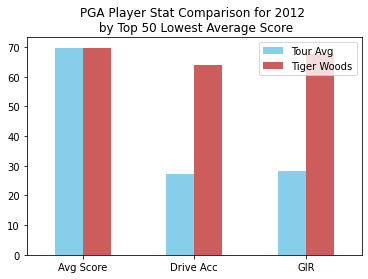

In [67]:
player_comparison = pd.DataFrame({'Tour Avg': tour_avg, user_player.title(): player_avg})
player_graph = player_comparison.plot.bar(color = ['SkyBlue','IndianRed'], rot=0,
                 title=f'PGA Player Stat Comparison for {year} \n by Top 50 Lowest Average Score')
plt.show()

I also included a section of code that allowed me to take my personal stats and compare them to the PGA Tour averages using the same arrangement from before. Here put my stats into a dictionary and converted it into a Pandas Series.

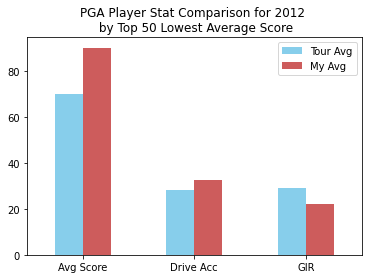

In [68]:
full_tour = player_stats.mean()
my_stats = {'Avg Score': 90, 'Drive Acc': 32.5, 'GIR': 22.2}  # here you can input your own stats to compare
my_series = pd.Series(my_stats)

personal_comparison = pd.DataFrame({'Tour Avg': full_tour, 'My Avg': my_series})
personal_graph = personal_comparison.plot.bar(color = ['SkyBlue','IndianRed'], rot=0,
                 title=f'PGA Player Stat Comparison for {year} \n by Top 50 Lowest Average Score')
plt.show()

You can clearly see that my golf game is significantly below par when it comes to the top golfers averages.